<a href="https://colab.research.google.com/github/Jerremiah/project-set/blob/main/Coffee_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering (Stroll Map)

<font size = 3>https://reurl.cc/MvE5GX</font>

# 載入常用程式庫

In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/MyDrive/adventure_time/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/adventure_time/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure/clustering/'
data_dir = groot_dir + 'clustering/'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)
    
def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran clustering basics...') 
print('\nLibraries and dependenciess imported')
print_now()

Mounted at /content/drive

Running on linux
Python Version 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
Data storage points to ==> /content/drive/MyDrive/adventure_time/clustering/

This module is amied to leran clustering basics...

Libraries and dependenciess imported
2021-06-13 18:06:49.279168


In [ ]:
def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    # plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

def grid_plot(figsize=(18, 14), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    # plt.tight_layout()
    gs=fig.add_gridspec(2, 2)
    with sns.axes_style(style):
        ax0 = fig.add_subplot(gs[0,0])
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[1,0])  
        ax3 = fig.add_subplot(gs[1,1]) 
    return [ax0, ax1, ax2, ax3]

# Download File 下載資料到硬碟

In [ ]:
fetch_file_via_requests(
    DropboxLink('teqrg5e5nyxpd59', 'Mall.csv'), data_dir )

# fetch_file_via_requests(
#     DropboxLink('2j1vjne1e8sdgr1', 'coffee5.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('qbaykxstu537u54', 'Clustering_gmm.csv'), data_dir )

fetch_file_via_requests(
    DropboxLink('l3o97cclfs7nw4j', 'coffee6.csv'), data_dir )


'/content/drive/MyDrive/adventure_time/clustering/coffee6.csv'

# Hierarchical Agglomerative Clustering

- [sklearn AllgomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

In [ ]:
malfile = os.path.join(data_dir,"Mall.csv")
malfile

mall = pd.read_csv(malfile)
print(mall.head())

#為了繪圖方便，僅取後面兩個欄位
mdf = pd.DataFrame(data = mall.iloc[:,[3,4]].values,
          columns = ["x","y"])
print(mdf.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
    x   y
0  15  39
1  15  81
2  16   6
3  16  77
4  17  40


### 用 scipy 製作 dendogram




### scikit-learn 的做法

### Comparison of Linkages （距離計算方式的比較）

# 咖啡漫步地圖

 - 發想源起 [Using Unsupervised Learning to plan a vacation to Paris: Geo-location clustering](https://towardsdatascience.com/using-unsupervised-learning-to-plan-a-paris-vacation-geo-location-clustering-d0337b4210de)
- [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula#:~:text=The%20haversine%20formula%20determines%20the,and%20angles%20of%20spherical%20triangles.)

# K-Means

- [sklearn KMeans API](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)
- [Understanding K-Means, K-Means++ and, K-Medoids Clustering Algorithms](https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca)

### Decision Bundary of KMeans

- [countour](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html)
- [countourf](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf)
- [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
 - [例圖](https://i.stack.imgur.com/LsjwA.png)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cafe_boundries(model, data, resolution = 1000,
    plot_centroids = False,
    figsize=(12,10), style='whitegrid'):

    mins = data.min(axis=0) - 0.01
    maxs = data.max(axis=0) + 0.01
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = start_plot(figsize=figsize, style = style)
    
    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel1", alpha = 0.2)
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k', alpha = 0.6)

    # labels = model.predict(data)
    labels = model.labels_
    ax.scatter(data[:,0], data[:,1], c = labels,
        cmap = 'coolwarm', edgecolor='navy', s=75)
    
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker = 'o',
        s = 220, edgecolor = 'k', c = 'w')
    for i, c in enumerate(centroids):
        ax.scatter(c[0], c[1], marker = '$%d$' % i,
            s = 80, edgecolor = 'r')


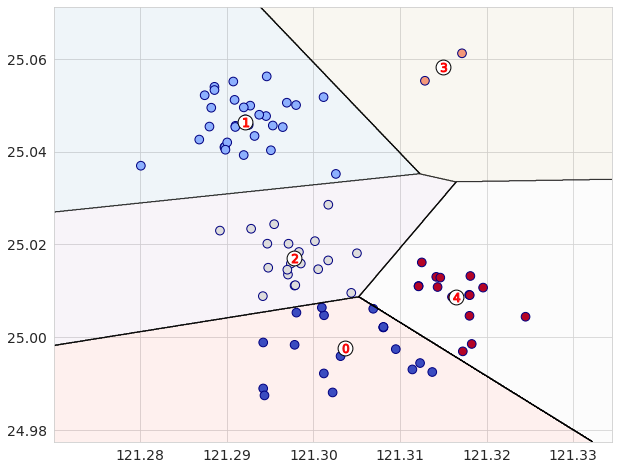

In [ ]:
n_k = 5
df = pd.read_csv(os.path.join(data_dir, 'coffee7.csv'))
X = df[coord].values
model = KMeans(n_clusters = n_k).fit(X)
cafe_boundries(model, X, style = 'whitegrid', figsize=(10, 8),
    plot_centroids = True)


# Elbow Method


- inertia_: 

    float, Sum of squared distances of samples to their closest cluster center.

# Silhouette scores

$s(x_i) = \frac{ b(x_i) - a(x_i)}{ \max \{ a(x_i), b(x_i) \}} , \ it\ is\ clear\ that\ -1 \le s(x_i) \le 1$

輪廓係數法的概念是「找出同群資料點內最近/不同群越分散」的值，也就是滿足 Cluster 的定義，b為不同群之間的點平均距離，a為同群之間的距離。S越大越好，代表分得越清楚。

- [sklearn silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)
- [sklearn silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
- [silhouette analysis source code](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)
- [Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

# DBSCAN
- [DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)

### plot_dbscan

In [ ]:
from sklearn.cluster import DBSCAN

def plot_dbscan(data, max_distance = 0.005, 
    min_samples = 5, 
    ax=None):
    if ax is None:
        ax = start_plot(figsize = (10, 8), style = 'darkgrid')

    max_distance = max_distance
    min_samples = min_samples

    db = DBSCAN(eps=max_distance, min_samples=min_samples).fit(data)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # plt.tight_layout()
    # core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    X = data

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]  
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='navy', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=7, 
                label = 'k = %d' % k if k != -1 else 'noise point')
    ax.set_title('DBSCAN on Coffe Map: estimated cluster = %d' % n_clusters_)
    ax.legend(title = 'eps=%.3f min_samples=%d' % (max_distance, min_samples),
            title_fontsize = 13, fontsize = 13,
            loc = 'best', shadow = True)

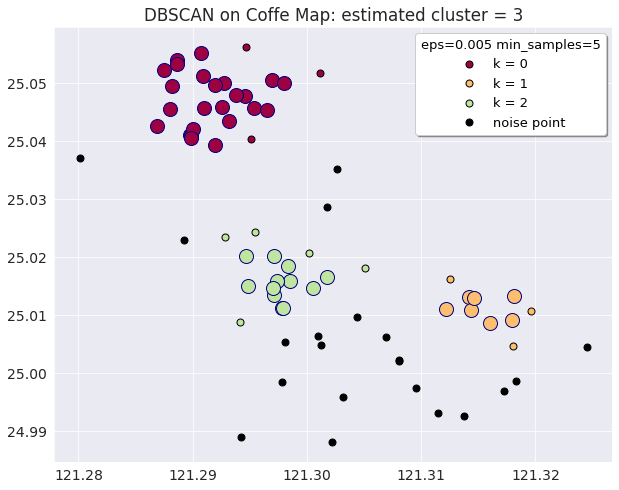

In [ ]:
plot_dbscan(cafe)

# Kernelized KMeans - SpectralClustering

- [cluster.SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html?highlight=spectralclustering#sklearn.cluster.SpectralClustering)

# GMM

使用 Colab 時，可以連接到本地電腦的 Jupyter Notebook，怎麼做

- 第一步：安裝延伸套件：
```
pip3 install --upgrade jupyter_http_over_ws>=0.0.7
jupyter serverextension enable --py jupyter_http_over_ws
```

- 第二步：
重新啟動 Jupyter，記得參數要寫對喔：
```
jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0 &
```


### get started

## preidct_proba

## file from kaggle

In [ ]:
#
# routines used to draw ellipse and mixture models
#
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
spines_bounds = ['left', 'right', 'bottom', 'top']

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
 
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
 
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def ty_gmm_map(n_k, train_data, ax = plt):

    # bounds = ['left', 'right', 'top', 'bottom']
    train_data = np.array(train_data)

    gmm = GaussianMixture(n_components = n_k).fit(train_data)
    labels = gmm.predict(train_data)
    probs = gmm.predict_proba(train_data)

    size = 60 * probs.max(1) ** 2

    sizelist = [ int(probs[i][labels[i]]*10)* 15+25 for i in range(len(labels))]

        
    ax.scatter(train_data[:,0], 
               train_data[:,1], c=labels, s=size, 
               cmap='viridis', zorder=2, edgecolor = (0, 0, 0))

    ax.set_title('TY Map Mixture Model, clusters = %d' % n_k)
  

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o',
                c="white", alpha=1, s=240, edgecolor='k')

    for i, c in enumerate(gmm.means_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=70, edgecolor='r')
       
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):       
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
             angle = 0
             width, height = 2 * np.sqrt(covariance)
 
        # Draw the Ellipse
        for nsig in range(1, 4):
            # print('width= %7.3f height=%7.3f angle=%d' % (nsig * width , nsig * height , angle))
            ax.add_patch(Ellipse(position, nsig * width , nsig * height,
                                 angle, alpha = w * w_factor))
      

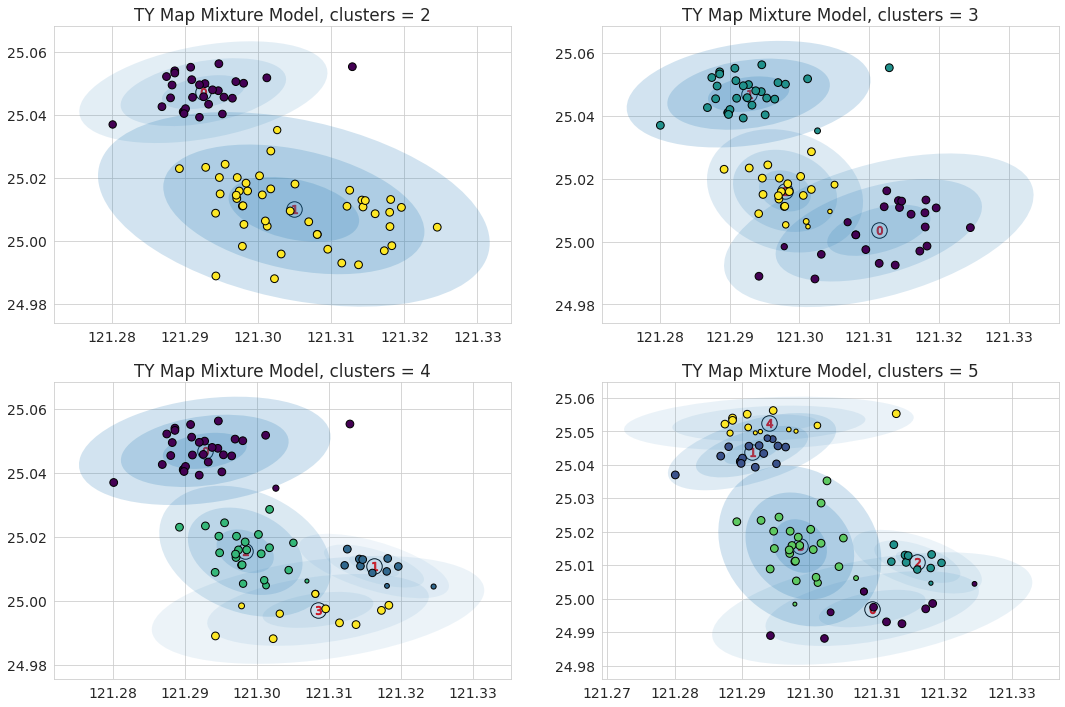

In [ ]:
ax = grid_plot(figsize=(18, 12))

for i in range(4):
    ty_gmm_map(i+2, cafe, ax = ax[i])

# KMean vs. GMM

In [ ]:


#
# routines used to draw ellipse and mixture models
#
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np

spines_bounds = ['left', 'right', 'bottom', 'top']

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
 
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
 
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def ty_gmm_map(n_k, train_data, ax = plt):

    # bounds = ['left', 'right', 'top', 'bottom']
    train_data = np.array(train_data)

    gmm = GaussianMixture(n_components = n_k).fit(train_data)
    labels = gmm.predict(train_data)
    probs = gmm.predict_proba(train_data)

    size = 60 * probs.max(1) ** 2

    sizelist = [ int(probs[i][labels[i]]*10)* 15+25 for i in range(len(labels))]

        
    ax.scatter(train_data[:,0], 
               train_data[:,1], c=labels, s=size, 
               cmap='viridis', zorder=2, edgecolor = (0, 0, 0))

    ax.set_title('TY Map Mixture Model, clusters = %d' % n_k)
  

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o',
                c="white", alpha=1, s=240, edgecolor='k')

    for i, c in enumerate(gmm.means_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=70, edgecolor='r')
       
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):       
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
             angle = 0
             width, height = 2 * np.sqrt(covariance)
 
        # Draw the Ellipse
        for nsig in range(1, 4):
            # print('width= %7.3f height=%7.3f angle=%d' % (nsig * width , nsig * height , angle))
            ax.add_patch(Ellipse(position, nsig * width , nsig * height,
                                 angle, alpha = w * w_factor))
    
def plot_dbscan(data, max_distance = 0.005, 
    min_samples = 5, 
    ax=None):
    if ax is None:
        ax = start_plot(figsize = (10, 8), style = 'darkgrid')

    max_distance = max_distance
    min_samples = min_samples

    db = DBSCAN(eps=max_distance, min_samples=min_samples).fit(data)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # plt.tight_layout()
    # core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    X = data

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]  
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='navy', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=7, 
                label = 'k = %d' % k if k != -1 else 'noise point')
    ax.set_title('DBSCAN on Coffe Map: estimated cluster = %d' % n_clusters_)
    ax.legend(title = 'eps=%.3f min_samples=%d' % (max_distance, min_samples),
            title_fontsize = 13, fontsize = 13,
            loc = 'best', shadow = True)

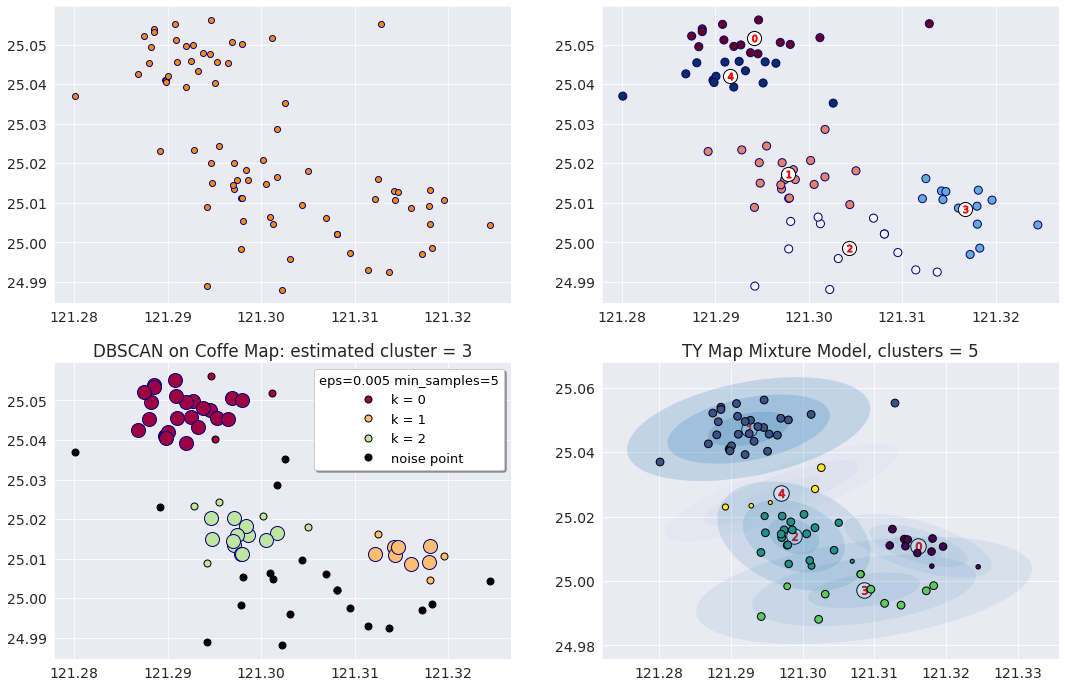

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

cafe_pos = df[coord].values
n_clusters = 5

ax = grid_plot(figsize=(18, 12), style='darkgrid')

ax[0].scatter(cafe_pos[:, 0], cafe_pos[:, 1],
    color = 'darkorange', edgecolor = 'navy')

knn = KMeans(n_clusters=n_clusters)
which_clusters = knn.fit_predict(cafe_pos)
centroids = knn.cluster_centers_
ax[1].scatter(cafe_pos[:,0], cafe_pos[:,1], s = 65, 
    c = which_clusters, edgecolor = 'navy', cmap = 'RdBu')

ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='r')

plot_dbscan(cafe_pos, ax = ax[2])
ty_gmm_map(n_clusters, cafe_pos, ax = ax[3])

output_fig(f'coffee - {n_clusters:d}')

# You Ain't See Anything Yet


